<a href="https://colab.research.google.com/github/agistarakha/RasainApp-ml/blob/develop/Data%20Preparation/imageResize.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
from zipfile import ZipFile

with ZipFile('/content/drive/MyDrive/indo_food_datasets/raw/kamera.zip', 'r') as zipObj:
   # Extract all the contents of zip file in different directory
   zipObj.extractall('/content/tmp/')
   print('File is unzipped in temp folder')

File is unzipped in temp folder


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
cp -R /content/drive/MyDrive/indo_food_datasets/jadi/food-dataset-500 /content/

In [25]:
import pathlib
import os

In [11]:
rm -rf ./tmp/

In [40]:
import tensorflow as tf


In [41]:
import numpy as np

In [42]:
from PIL import Image

In [91]:
def resize_img_adv(img, dir):
  imgNumpy = np.array(img)

  imgOutput = tf.image.resize(
      imgNumpy,
     [150,150],
      )
  imgFinal = tf.keras.preprocessing.image.array_to_img(imgOutput)
  imgFinal.save(dir)


In [ ]:
folder_name = 'tahupetis'
data_dir = pathlib.Path(folder_name)
nasi_gorengs = list(data_dir.glob('*.png'))
# str(nasi_gorengs[0])
for img_dir in nasi_gorengs:
  name = str(img_dir)
  print(name)
  resize_img_adv(Image.open(str(img_dir)), name)

In [83]:
ls /content/food-dataset-500-v2/train/onde-onde/ | wc -l

400


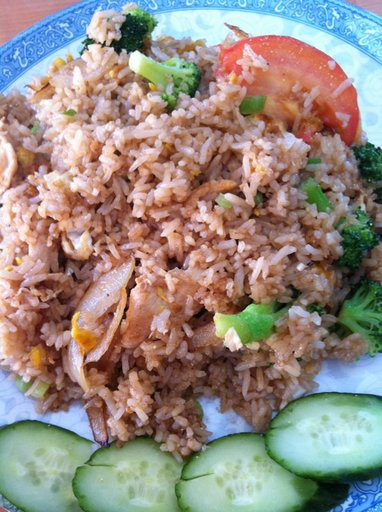

In [104]:
Image.open('/content/raw/nasi-goreng/156926.jpg')

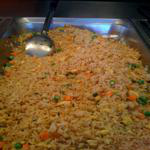

In [87]:
Image.open('/content/food-dataset-500-v2/train/nasi-goreng/61401.jpg')

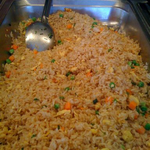

In [100]:
Image.open('./output.png')

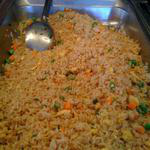

In [105]:
Image.open('/content/food-dataset-500-v2/train/nasi-goreng/61401.jpg')

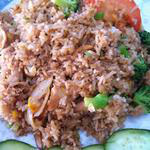

In [106]:
Image.open('/content/food-dataset-500-v2/train/nasi-goreng/156926.jpg')

In [101]:
def crop_resize(image, size, ratio,dir):
    # crop to ratio, center
    w, h = image.size
    if w > ratio * h: # width is larger then necessary
        x, y = (w - ratio * h) // 2, 0
    else: # ratio*height >= width (height is larger)
        x, y = 0, (h - w / ratio) // 2
    image = image.crop((x, y, w - x, h - y))

    # resize
    if image.size > size: # don't stretch smaller images
        image.thumbnail(size, Image.ANTIALIAS)
    image.save(dir)

In [20]:
rm -rf /content/raw/food_img.zip

In [ ]:
!zip -r hasil.zip hasil

In [21]:
cp -R ./tmp/nasi-goreng/ ./raw/

In [ ]:
cp hasil.zip drive/MyDrive/indo_food_datasets/jadi/

In [4]:
cp /content/drive/MyDrive/indo_food_datasets/raw/food_img.zip /content/raw/

In [23]:
cp -R /content/raw /content/drive/MyDrive/indo_food_datasets/raw

In [35]:
list_food = [name for name in os.listdir("/content/raw") if os.path.isdir("/content/raw/"+name)]


['pastel',
 'nasi-goreng',
 'klepon',
 '.ipynb_checkpoints',
 'tahupetis',
 'bakso',
 'tumpeng',
 'sate',
 'nastar',
 'onde-onde',
 'rendang']

In [97]:
def crop_img(im, dir):
  new_width = 150
  new_height = 150
  width, height = im.size   # Get dimensions
  left = (width - new_width)/2
  top = (height - new_height)/2
  right = (width + new_width)/2
  bottom = (height + new_height)/2

  # Crop the center of the image
  im = im.crop((left, top, right, bottom))
  im.save(dir)

In [ ]:
food_list = ['pastel',
 'nasi-goreng',
 'klepon',
 'tahu-petis',
 'bakso',
 'tumpeng',
 'sate',
 'nastar',
 'onde-onde',
 'rendang']

train_dataset_dir = "/content/food-dataset-500/train"
test_dataset_dir = "/content/food-dataset-500/test"
raw_img_dir = "/content/raw"
for food in food_list:
  train_img_list = []
  test_img_list = []
  train_dataset_img = os.path.join(train_dataset_dir,food)
  test_dataset_img = os.path.join(test_dataset_dir,food)
  for path in os.listdir(train_dataset_img):
    if os.path.isfile(os.path.join(train_dataset_img, path)):
      train_img_list.append(path)


  for path in os.listdir(test_dataset_img):
    if os.path.isfile(os.path.join(test_dataset_img, path)):
      test_img_list.append(path)
  print(test_img_list)
  raw_img = os.path.join(raw_img_dir,food)
  for path in os.listdir(raw_img):
    if os.path.isfile(os.path.join(raw_img, path)):
      food_img = Image.open(os.path.join(raw_img, path))
      food_img.show()
      if path in test_img_list:
        #food_img.resize((150,150)).save(os.path.join("/content/food-dataset-500-v2/test",food,path))
        #resize_img_adv(food_img, os.path.join("/content/food-dataset-500-v2/test",food,path))
        #crop_img(food_img, os.path.join("/content/food-dataset-500-v2/test",food,path))
        crop_resize(food_img, (150,150), 1, os.path.join("/content/food-dataset-500-v2/test",food,path))

      if path in train_img_list:
        #resize_img_adv(food_img, os.path.join("/content/food-dataset-500-v2/train",food,path))
        crop_resize(food_img, (150,150), 1, os.path.join("/content/food-dataset-500-v2/train",food,path))
        #food_img.resize((150,150)).save(os.path.join("/content/food-dataset-500-v2/train",food,path))
        

In [107]:
cp -R /content/food-dataset-500-v2 /content/drive/MyDrive/indo_food_datasets/jadi